# Suopport Vector Machines

Support Vector Machines (SVM) ia a supervised learning model with associated learning algorithms that analyze data for classification and regression analysis. In this notebook, we discuss the mathametical basis behind it and try to implement a simple version of it from scratch.

### What does the SVM do ?

For a classification problem, the SVM tries to find the decision boundary that best splits the samples. Let's consider the following example,

![](assets/images/which-db-is-better.jpg)

Both lines separate the samples correctly. But which separates ***the best*** ? Obviously, it the green line. Why ? The green line separates the samples correctly with maximum **margin** possible from the close samples unlike the brown line where the margins are small.

![](assets/images/max-margin.jpg)

![](assets/images/small-margin.jpg)

What SVM does is to find the decision boundary that correctly classify the samples and at the same time maximizes the margin with the close samples.

### Notations for SVM

For convenient mathematical modeling for the SVM, we use the following notations:

* $y_i$, the target of the samples can be either -1 for negative samples or 1 for positive samples.
* $x_+$, a positive sample
* $x_-$, a negative sample

### How does the SVM work?

![](assets/images/svm-db.jpg)

Let's say that that we know the decision boundary that best sepearates the samples. If the example lies on the right side of the boundary, we classify it as (+), and vice-versa. We know that the weights vector of the decision boundary is orthogonal (perpendicular) on the decision boundary itself [why?](https://qr.ae/pv2EZT). Let's say we have 2 unknown samples, $\vec{x_1}$ and $\vec{x_2}$,

![](assets/images/decision-function.jpg)

The class of the unkown sample can be determined based on its location with respect to the decision boundary. On the right of it, we classify it as positive and vice-versa. We can formulate this as follows,

$$
\hat{y_i} = 
     \begin{cases}
       1 &\quad \vec{w} \cdot \vec{x_i} \geq c\\
       0 &\quad\vec{w} \cdot \vec{x_i} < c\\
     \end{cases}
$$

which can be written as,

$$\boxed{
\hat{y_i} = 
     \begin{cases}
       1 &\quad \vec{w} \cdot \vec{x_i} + b \geq 0\\
       0 &\quad\vec{w} \cdot \vec{x_i} + b< 0\\
     \end{cases}
} \tag{1}
$$
where $b = -c$



### How do we get $\vec{w}$ and $b$ ?

To find the decision boundary $\vec{w} \cdot \vec{x_i} + b = 0$ which maximizes the margin between samples, we define 2 hyperplanes (lines); $\vec{w} \cdot \vec{x_i} + b = 1$ and $\vec{w} \cdot \vec{x_i} + b = -1$ like shown in the figures above. The distance between the 2 hyperplanes is the width of the SVM decision boundary which we want to maximize. Where for each example, the following should be satisified:

* If $y_i = 1$, then $\vec{w} \cdot \vec{x_i} + b \geq 1$
* If $y_i = -1$ then $\vec{w} \cdot \vec{x_i} + b \leq -1$ 

We can multiply both equations by $y_i$, we now get:

* $y_i \left(\vec{w} \cdot \vec{x_i} + b \right) \geq 1$, For $y_i = 1$
* $y_i \left(\vec{w} \cdot \vec{x_i} + b \right) \geq 1$, For $y_i = -1$

Which are the same equation which constraints the training of the SVM to find the best decision boundary.

$$
\boxed{y_i \left(\vec{w} \cdot \vec{x_i} + b \right) - 1 \geq 0} \tag{2}
$$


To get the width of the boundary, we define the following,

* a support vector is a sample that lies on either $\vec{w} \cdot \vec{x_i} + b = 1$ or $\vec{w} \cdot \vec{x_i} + b = -1$
* $\vec{x}_{+SV}$ is a point that lies on the $\vec{w} \cdot \vec{x_i} + b = 1$.
* $\vec{x}_{-SV}$ is a point that lies on the $\vec{w} \cdot \vec{x_i} + b = -1$

![](assets/images/width.jpg)

To calculate the width, we project the difference vector $\vec{x}_{+SV} - \vec{x}_{-SV}$ on the unit vector $\frac{\vec{w}}{||\vec{w}||}$.

$$
\text{WIDTH} = \vec{x}_{+SV} - \vec{x}_{-SV} \cdot \frac{\vec{w}}{||\vec{w}||} \tag{3}
$$

From
$$
\vec{w} \cdot \vec{x_{+SV}} + b = 1 \Longrightarrow \boxed{\vec{x_{+SV}} = \frac{1 - b}{\vec{w}}}
$$

and

$$
\vec{w} \cdot \vec{x_{-SV}} + b = -1 \Longrightarrow \boxed{\vec{x_{-SV}} = \frac{-1 - b}{\vec{w}}}
$$

we get

$$
\text{WIDTH} = {\left[\left( \frac{1 - b}{\vec{w}} \right) - \left( \frac{-1 - b}{\vec{w}} \right)\right]} \cdot \frac{\vec{w}}{||\vec{w}||} 
$$

which resolves to,

$$
\boxed{\text{WIDTH} = \frac{2}{||\vec{w}||}} \tag{4}
$$

Our target is to maximize the width,

$$
\text{MAX WIDTH} \equiv \text{MAX} \frac{2}{||\vec{w}||} \equiv \text{MIN} {||\vec{w}||} \equiv \boxed{\text{MIN} \quad \frac{1}{2} ||\vec{w}||^2} \tag{5}
$$

we use the latter form of optimization problem for "mathematical convenience"...

### Lagrange Dual Optimization

For MIN optimization problems with constraints, a popular approach is to use the lagrange multipliers theorem. To check the lagrange multipliers, check [this](https://machinelearningmastery.com/a-gentle-introduction-to-method-of-lagrange-multipliers/) and [this](https://machinelearningmastery.com/lagrange-multiplier-approach-with-inequality-constraints/).

The function to optimize is $\text{MIN} \quad \frac{1}{2} ||\vec{w}||^2$ with $\quad y_i \left(\vec{w} \cdot \vec{x_i} + b \right) - 1 \geq 0$ as our constraint. With lagrange multipliers we can define the lagrance optimization function as

$$
L(\vec{w}, b) = \frac{1}{2} ||\vec{w}||^2 - \sum_i \alpha_i \left[ y_i \left(\vec{w} \cdot \vec{x_i} + b \right) - 1 \right]
$$

We can now get the extremas $\vec{w}$ and $b$ by minimizing the above function,

$$
\frac{\partial L}{\partial \vec{w}} = \vec{w} - \sum_i \alpha_i y_i \vec{x_i} = 0
$$

from which, we can deduce that

$$
\boxed{\vec{w} = \sum_i \alpha_i y_i \vec{x_i}} \tag{6}
$$

which tells that the weights vector of the decision boundary is a linear weighted summation of the samples.

$$
\frac{\partial L}{\partial b} = - \sum_i \alpha_i y_i = 0
$$

from which, we can deduce that

$$
\boxed{\sum_i \alpha_i y_i = 0} \tag{7}
$$

Substituting (6) and (7) in the lagrange function,

$$
L = \frac{1}{2} \left( \sum_i \left( \alpha_i y_i \vec{x_i} \right) \right) \left( \sum_j \left( \alpha_j y_j \vec{x_j} \right) \right) - \sum_i \left( \alpha_i y_i \vec{x_i} \right) \left( \sum_j \left( \alpha_j y_j \vec{x_j} \right) \right) - \cancel{\sum_i \left( \alpha_i y_i \right) b} + \sum_i \alpha_i
$$

which resolves to,

$$
\boxed{
L = \sum_i \alpha_i - \frac{1}{2} \sum_i \sum_j \alpha_i \alpha_j y_i y_j (\vec{x_i} \cdot \vec{x_j})
} \tag{8}
$$

which tells us that the optimization problem only depends on the dot product of the pairs of the samples (or some of them depending on the values of $\alpha_i$). That function we want to find the $\alpha_i$ that ***maximizes*** it. [Why?](https://cs.stackexchange.com/a/90914)

Substituting (6) in (1),

$$\boxed{
\hat{y_j} = 
     \begin{cases}
       1 &\quad \sum_i \alpha_i y_i \vec{x_i} \cdot \vec{x_j} + b \geq 0\\
       0 &\quad \sum_i \alpha_i y_i \vec{x_i} \cdot \vec{x_j} + b< 0\\
     \end{cases}
} \tag{9}
$$

Again the prediction depends on only the dot product of the unknown sample with some of the known samples, the support vectors.

After we solve (8) for $\alpha_i$ with (7) as their linear constraint using any optimization software packages (e.g., `sklearn.minimize` which we will use later), we can compute $\vec{w}$ and $b$ using the following:

* $\vec{w} = \sum_i \alpha_i y_i \vec{x_i}$
* For $\vec{x_i}$ in the support vectors (i.e., $\alpha_i \neq 0$), we calculate its $b$ using $y_i \left( \vec{w} \cdot \vec{x_i} + b \right) - 1 = 0$. Then take the average.

### Soft-Margin SVM

What we described above is called hard-margin classifier which tries to find the **linear** decision boundary that separates the samples the best ***without any misclassification***. The examples we used above were linearly separable. So the hard margin classifier would work very well. However, for a data that isn't linearly separable, our algorithm won't work. Let's take for example the following figure,

![](assets/images/non-linearly-separable.jpg)

We would thought the the best linear boundary possible would still missclassify a couple of samples. However, the hard margin won't take into consideration any misclassications while fitting. Therefore, a soft-margin SVM is introduced to allow some misclassifcation as well as the existence of samples inside the region.

![](assets/images/soft-margin.jpg)

For that, we introduce another term in the constraint in the optimzation function,

$$ y_i \left( \vec{w} \cdot \vec{x_i} + b \right) - 1 + \xi \geq 0$$

where $\xi_i$, which quantifies the errors in the classification of training points, can have 3 states:

* $\xi_i = 0$, then $x_i$ is classified correctly.
* $0 < \xi_i < 1$, then $x_i$ is on the right side of the boundary but inside the margin (width).
* $\xi_i > 1$, then $x_i$ is on the wrong side of the boundary so it's misclassified.

We can define $E_{\text{soft}}$ as the soft error as follows,

$$E_{\text{soft}} = \sum_i \xi_i$$

Now we can define the optimization problem as follows,

$$\text{MIN} \frac{1}{2} ||\vec{w}|| + C E_{\text{soft}} \quad \text{s.t.} \quad y_i \left( \vec{w} \cdot \vec{x_i} + b \right) - 1 + \xi \geq 0 \quad \text{and} \quad \xi_i \geq 0$$

where $C$ is a hyperparameter that defines the strength of the regularization. A large C would require very low soft error to optimize and vice-versa. Applying the Lagrange multipliers stuff, we get the following final form of optimization function,

$$ \boxed{ L = \sum_i \alpha_i - \frac{1}{2} \sum_i \sum_j \alpha_i \alpha_j y_i y_j (\vec{x_i} \cdot \vec{x_j}) \quad \text{s.t.} \quad 0 \leq \alpha_i \leq C \quad \text{and} \quad \sum_i \alpha_i y_i = 0 } \tag{10}$$

The value of $\alpha_i$ determine the state of the training sample:

* $\alpha_i = 0$, the training sample is one the correct side of the boundary and not in the margin. The point plays no role in the model.
* $0 < \alpha_i < C$, the training sample is a support vector and lies on either of $y_i \left( \vec{w} \cdot \vec{x_i} + b \right) - 1 = 0$ planes.
* $\alpha_i = C$, the training sample is either on the margin on the correct side of the boundary or outside the margin but in the wrong side.

### Implementation of the soft-margin SVM

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

0 is a very specific value, and because we are going to use some numerical analysis for the optimization, we may reach a value for $\alpha_i$ very very close to 0 but not 0. So, we are going to define `EPSILON` to a very small value to compare using it instead of the absolute 0.

In [3]:
EPSILON = 1e-7

For optimization, we are going to use `scipy` package, specifically `scipy.optimize.minimize` which requires the following,

```py
optimal_alphas = minimize(
    lagrange_duality_optimization_function,
    initial_alphas,
    args = (training_samples, training_labels),
    method = "trust-constr", 
    # 'trust-constr' is a minimization method of a scalar function using exact trust-region-algorithm
    hess = BFGS(),
    # hess defines the method to calculate the hessian matrix (needed for some opt methods),
    constraints = [linear_constraint],
    # if exists, we define here the linear constraint of the alphas, which is for our SVM sum(alpha_i * y_i) = 0
    bounds = alphas_bounds
    # if exists, we define here the bounds of alpha which are for the SVM, 0 <= alpha_i <= C
)
```

First, we create a function that calculates the Lagrange dual optimization function given $\alpha_i$, x (training samples), and y (the training labels).

$$L = \sum_i \alpha_i - \frac{1}{2} \sum_i \sum_j \alpha_i \alpha_j y_i y_j (\vec{x_i} \cdot \vec{x_j})$$

As we noted above, we will convert the maximization to minimization, so the new function will be

$$L_{\text{min}} = \frac{1}{2} \sum_i \sum_j \alpha_i \alpha_j y_i y_j (\vec{x_i} \cdot \vec{x_j}) - \sum_i \alpha_i$$

In [4]:
def lagrange_dual_function(alphas, x, y):
    result = 0
    for i in range(len(alphas)):
        for j in range(len(alphas)):
            result += (alphas[i] * alphas[j] * y[i] * y[j] * np.dot(x[i, :], x[j, :]))
    result = 0.5 * result - sum(alphas)
    return result

As we know, our linear constraint for the $\alpha_i$ is $\sum_i \alpha_i y_i = 0$. To define that in Python, we will use `scipy.optimize.LinearConstraint`. It requires to write the constraint in a two-sided matrix form which will be

$$
0 = 
\begin{bmatrix}
y_0 \\
y_1 \\
\vdots \\
y_{m-1}
\end{bmatrix}  \begin{bmatrix}
\alpha_0 & \alpha_1 & \cdots & \alpha_{m-1} 
\end{bmatrix} = 0
$$

```py
LinearConstraint(
    labels_vector,
    [LHS_value],
    [RHS_value]
)
```

In [5]:
from scipy.optimize import LinearConstraint

def generate_linear_constraint(y):
    return LinearConstraint(
        y,
        [0],
        [0]
    )

To define the bounds of the $\alpha_i$, we will use `scipy.optimize.Bounds` in which it takes a LHS vector of the values for each $\alpha$ which will be 0 for each and RHS vector of the values for each $\alpha_i$ which will be C for each.

In [6]:
from scipy.optimize import Bounds

def generate_bounds(m, C):
    return Bounds(np.zeros(m), np.ones(m) * C)

Now, we write the whole pipeline to get the $\alpha_i$.

In [7]:
from scipy.optimize import minimize
from scipy.optimize import BFGS

def optimize_alphas(x, y, C):
    m, n = x.shape
    initial_alphas = np.random.random(m) * C
    linear_constraint = generate_linear_constraint(y)
    bounds = generate_bounds(m, C)
    result = minimize(
        lagrange_dual_function,
        initial_alphas,
        args = (x, y),
        method = "trust-constr",
        hess = BFGS(),
        constraints = [linear_constraint],
        bounds = bounds
    )
    return result.x

After we have the alphas, we can calculate $\vec{w}$.

In [63]:
def calculate_w(alphas, x, y):
    w = np.zeros(x.shape[1])
    for i in range(len(alphas)):
        w = w + alphas[i] * y[i] * x[i, :]
    return w

We calculate $b$ by finding the average of the $b\text{s}$ of the support vectors' planes equation. For a support vector, its $b$ is calculated by

$$
b = y_i - (\vec{w} \cdot \vec{x_{\text{sv}}})
$$

In [64]:
def calculate_b(alphas, x, y, w, C):
    support_vectors = np.where((alphas > EPSILON) & (alphas < C))[0]
    b = 0
    for sv in support_vectors:
        b += (y[sv] - np.dot(w, x[sv, :]))
    return b / len(support_vectors)

The prediction function depends on the side of the test sample w.r.t. the boundary.

In [26]:
def classify(x_test, w, b):
    raw_output = np.sum(x_test * w, axis = 1) + b
    classes = np.sign(raw_output)
    return classes

def classification_error(labels, predictions):
    return (sum(labels != predictions) / len(labels))

Now, we are ready to apply our algorithm.

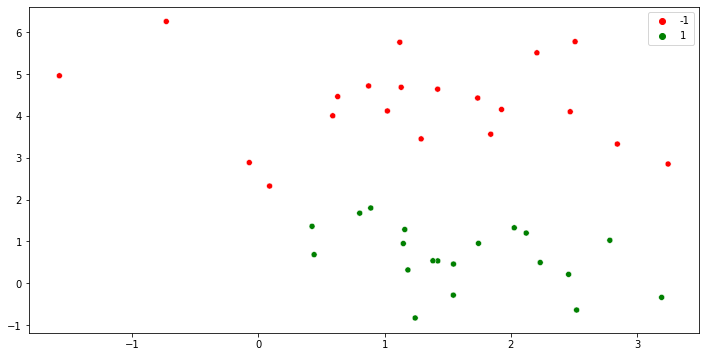

In [86]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

data, labels = make_blobs(
    n_samples=[20, 20],
    cluster_std=1,
    random_state=0)

labels[labels == 0] = -1

plt.figure(figsize=(12, 6))
sns.scatterplot(
    x = data[:, 0],
    y = data[:, 1],
    hue = labels,
    palette = ["red", "green"]
)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, stratify = labels)

In [66]:
alphas = optimize_alphas(X_train, y_train, C = 100)

In [67]:
w = calculate_w(alphas, X_train, y_train)

In [68]:
b = calculate_b(alphas, X_train, y_train, w, 100)

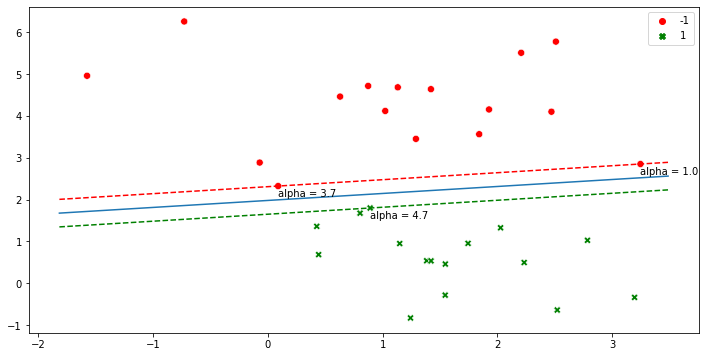

In [81]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x = X_train[:, 0],
    y = X_train[:, 1],
    hue = y_train,
    style = y_train,
    s = 50,
    palette = ["red", "green"]
)

sv = np.where(alphas > EPSILON)[0]
for i in sv:
    plt.text(X_train[i, 0], X_train[i, 1] - 0.25, "alpha = {:.1f}".format(alphas[i]))

x_axis = plt.gca().get_xlim()
y_axis = plt.gca().get_ylim()
y_hyperplane = (1 / w[1]) * (-w[0] * np.array(x_axis) - b)
plt.plot(x_axis, y_hyperplane)

y_hyperplane_pos = (1 / w[1]) * (1 - w[0] * np.array(x_axis) - b)
plt.plot(x_axis, y_hyperplane_pos, "--", color = "green")

y_hyperplane_pos = (1 / w[1]) * (-1 - w[0] * np.array(x_axis) - b)
plt.plot(x_axis, y_hyperplane_pos, "--", color = "red")

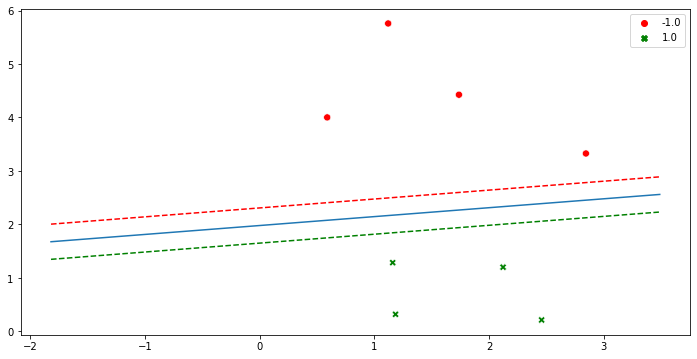

In [84]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x = X_test[:, 0],
    y = X_test[:, 1],
    hue = classify(X_test, w, b),
    style = y_test,
    s = 50,
    palette = ["red", "green"]
)

y_hyperplane = (1 / w[1]) * (-w[0] * np.array(x_axis) - b)
plt.plot(x_axis, y_hyperplane)

y_hyperplane_pos = (1 / w[1]) * (1 - w[0] * np.array(x_axis) - b)
plt.plot(x_axis, y_hyperplane_pos, "--", color = "green")

y_hyperplane_pos = (1 / w[1]) * (-1 - w[0] * np.array(x_axis) - b)
plt.plot(x_axis, y_hyperplane_pos, "--", color = "red")

We discussed the usage of SVM to build linear decision boundaries. However, we can use it also for non-linear decision boundaries using ***kernel tricks***. Check it from the second half of [[2]](https://www.youtube.com/watch?v=lDwow4aOrtg).

References:

1. [MIT SVM Lecture](https://www.youtube.com/watch?v=_PwhiWxHK8o)
2. [Stanford SVM Lecture](https://www.youtube.com/watch?v=lDwow4aOrtg)
3. [Method of Lagrange Multipliers: The Theory Behind Support Vector Machines](https://machinelearningmastery.com/method-of-lagrange-multipliers-the-theory-behind-support-vector-machines-part-3-implementing-an-svm-from-scratch-in-python/)